In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
!nvidia-smi

Tue Dec 12 11:56:43 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.01                 Driver Version: 546.01       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0  On |                  N/A |
| 23%   40C    P8               9W /  75W |    412MiB /  4096MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\afiqe


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

DEPRECATION: Loading egg at c:\users\afiqe\anaconda3\lib\site-packages\mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

TRAIN MODEL

In [ ]:
# !mkdir {HOME}\\datasets
# %cd {HOME}\\datasets

local_dataset_path = "C:\\Users\\afiqe\\Downloads\\FYP DATASET LAMA.v10-latest-dataset.yolov8"
print(local_dataset_path)


In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [13]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="D3pOhBcnTUJ1uZTMsWBN")
# project = rf.workspace("fyp-lyisg").project("fyp-dataset-lama")
# dataset = project.version(10).download("yolov8")

In [14]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset}/data.yaml epochs=100 imgsz=200

C:\Users\afiqe


The system cannot find the file specified.


C:\Users\afiqe


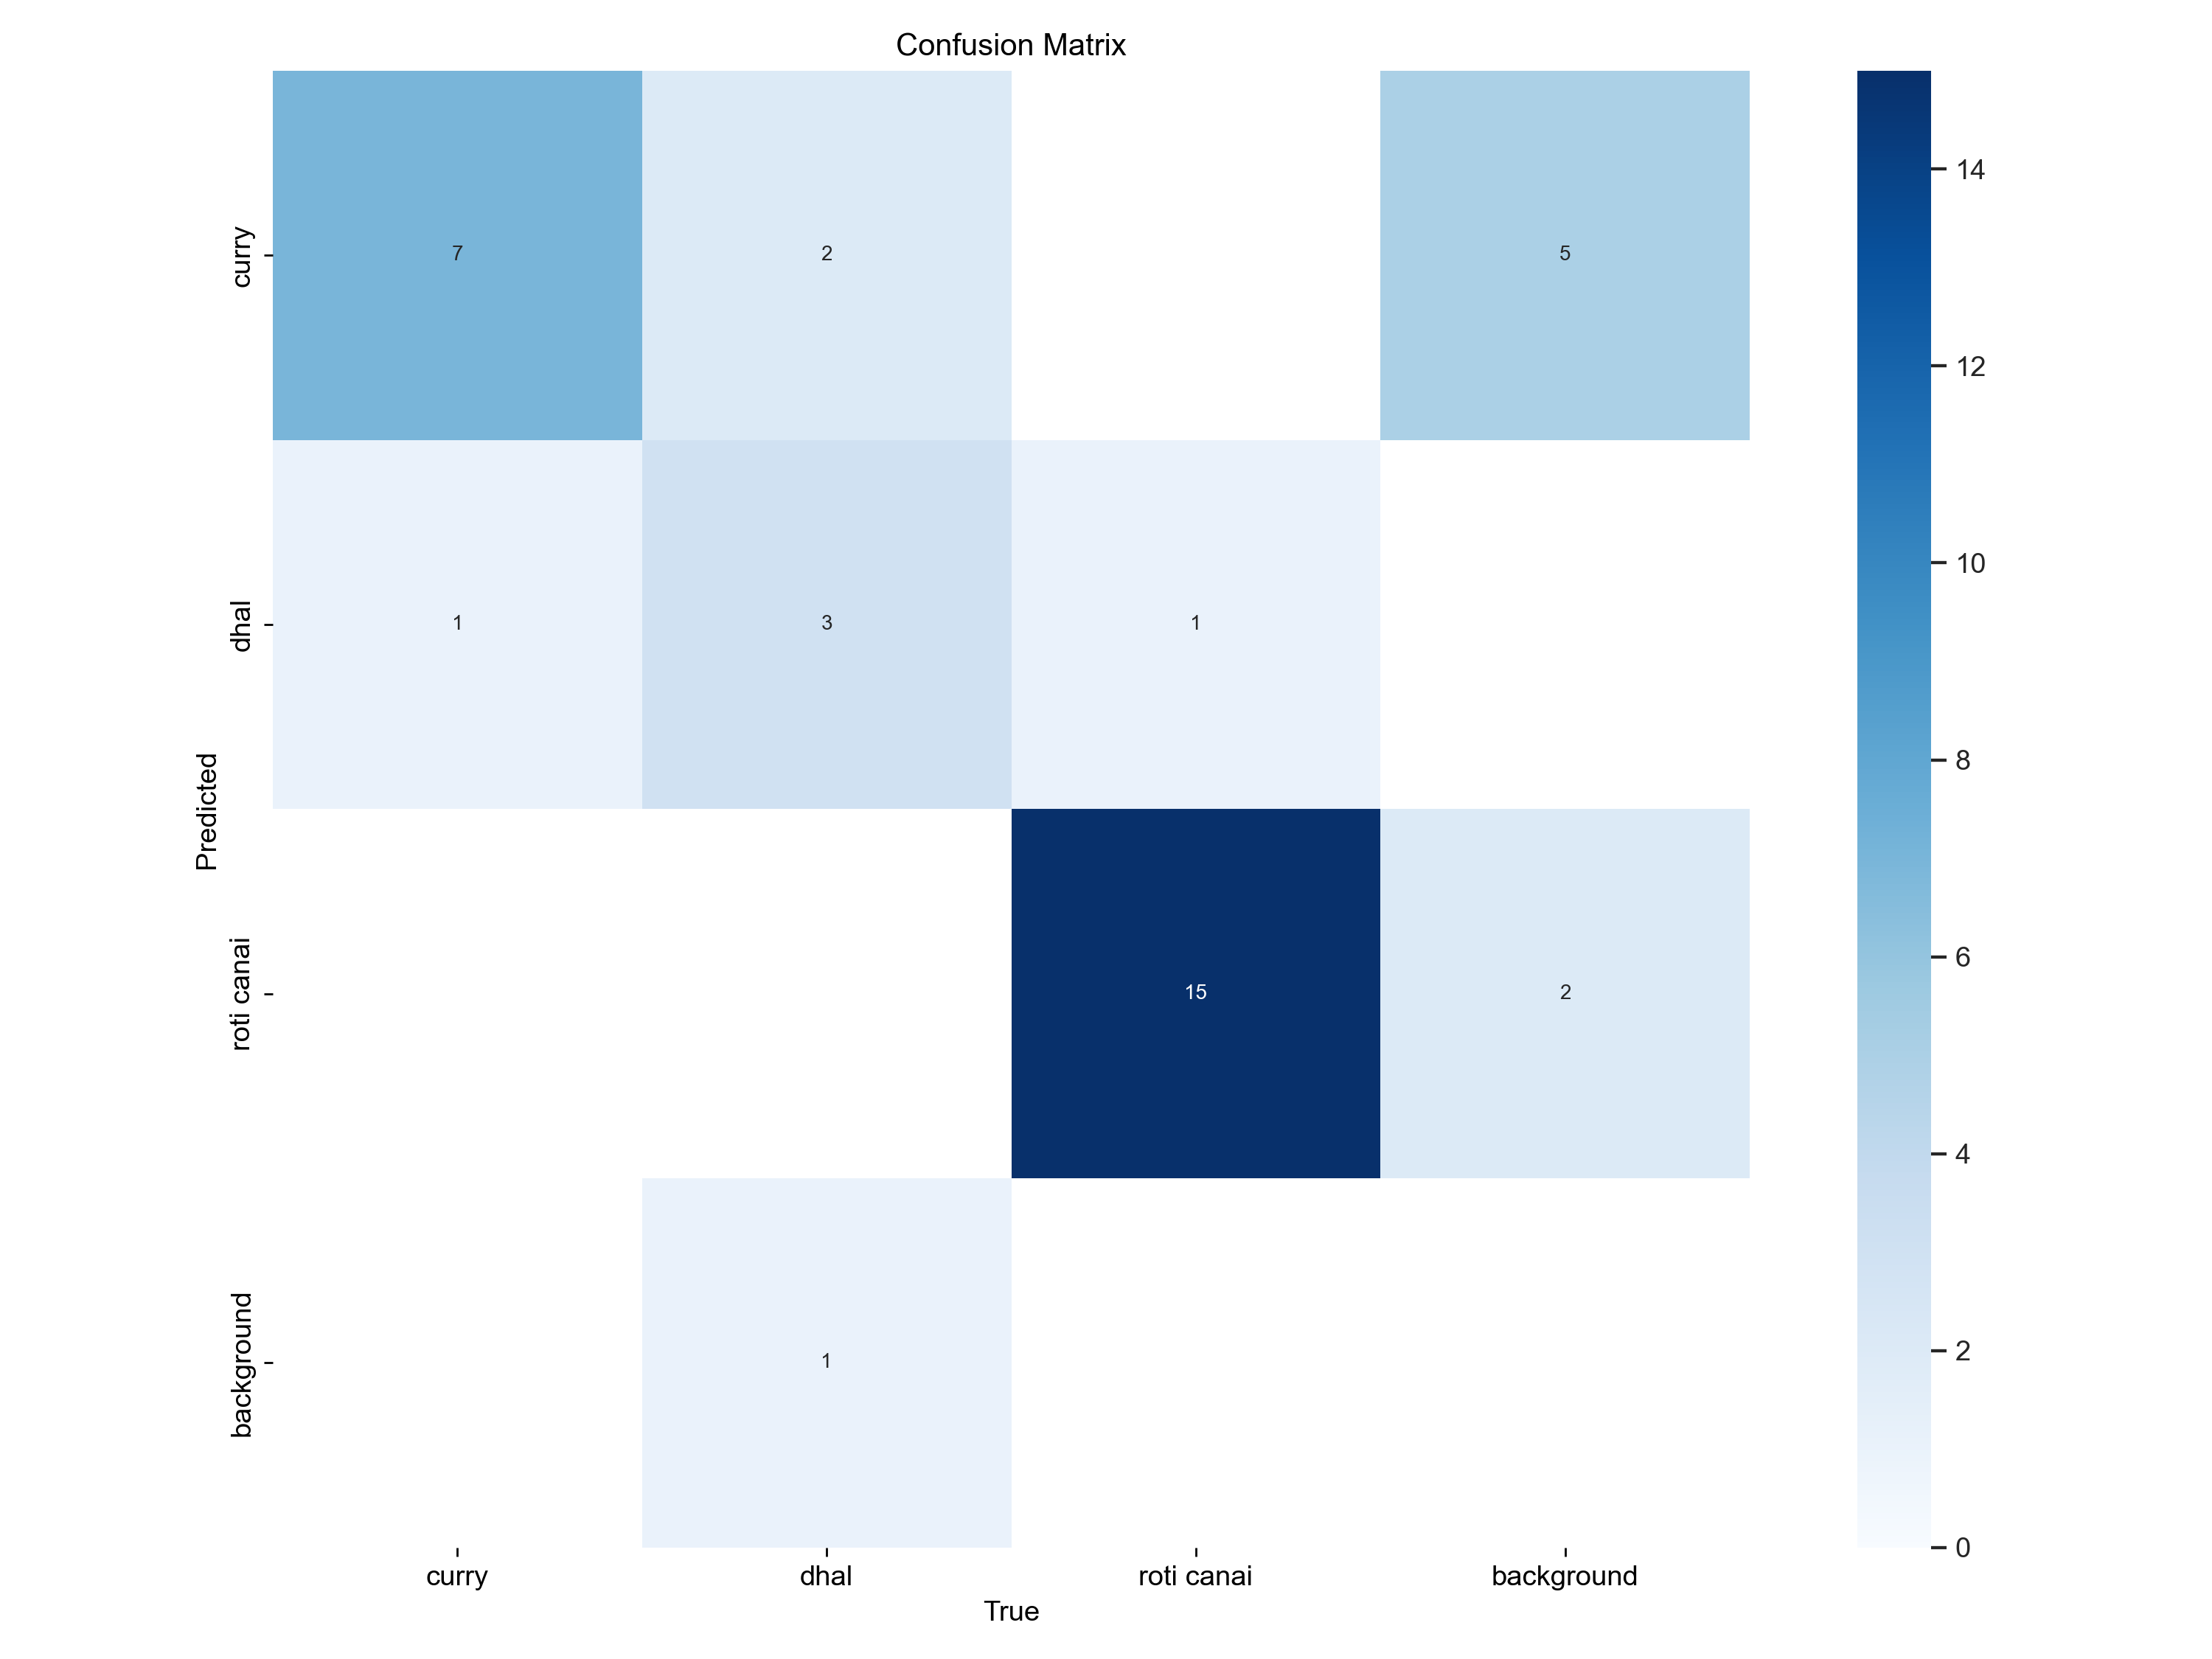

In [104]:
%cd {HOME}
Image(filename=f'{HOME}\\runs\\segment\\train11\\confusion_matrix.png', width=900)

C:\Users\afiqe


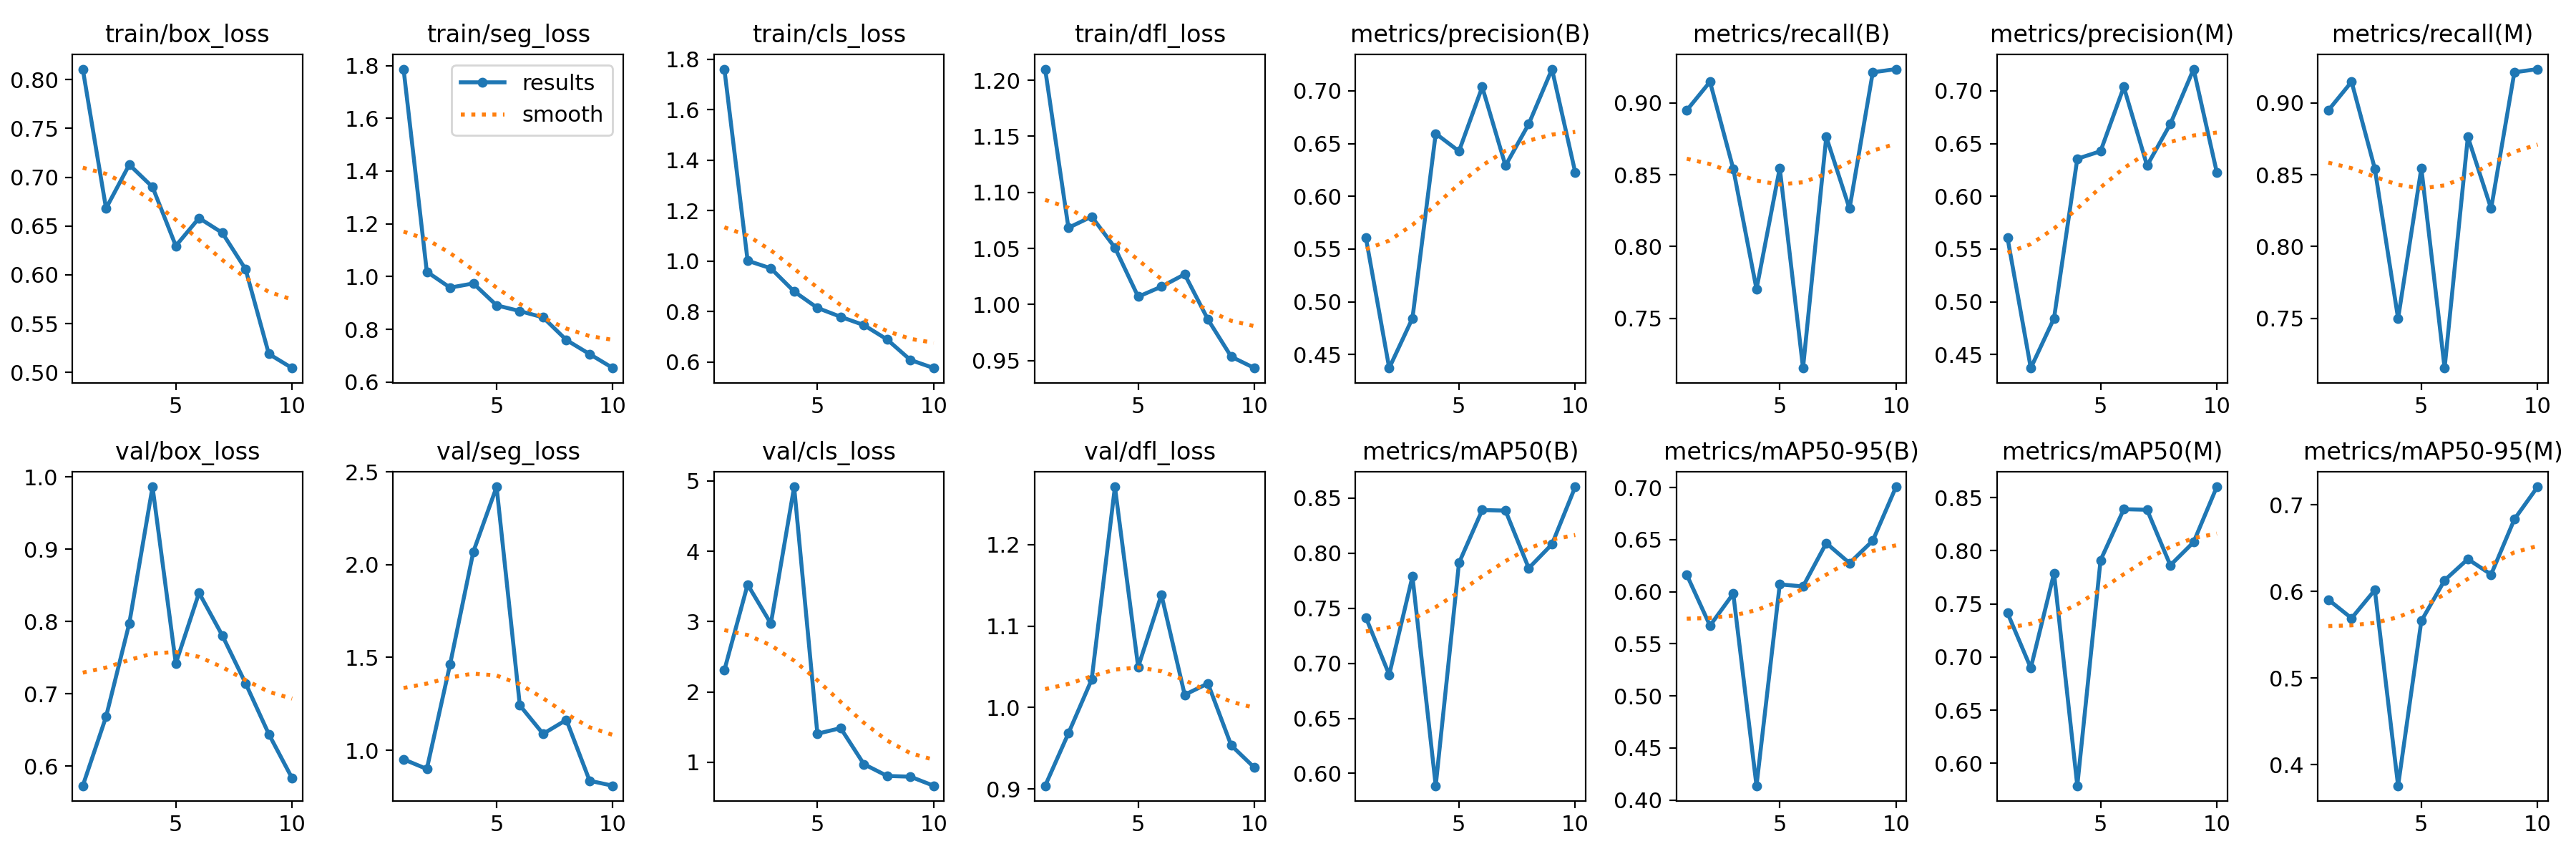

In [103]:
%cd {HOME}
Image(filename=f'{HOME}\\runs\\segment\\train11\\results.png', width=900)

C:\Users\afiqe


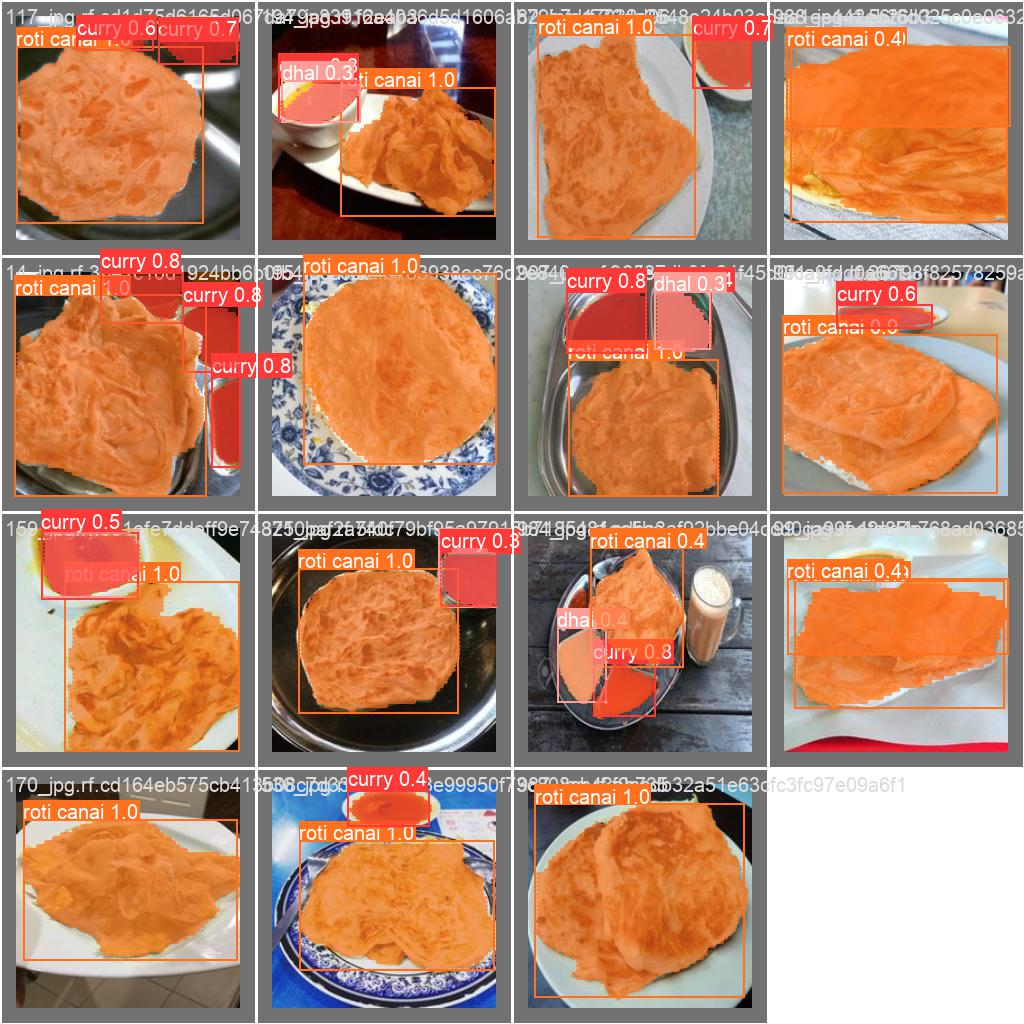

In [78]:
%cd {HOME}
Image(filename=f'{HOME}\\runs\\segment\\train11\\val_batch0_pred.jpg', width=600)

VALIDATION

In [79]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}\\runs\\segment\\train11\\weights\\best.pt data={local_dataset_path}\\data.yaml

C:\Users\afiqe


Ultralytics YOLOv8.0.196  Python-3.11.5 torch-2.1.0+cpu CPU (Intel Core(TM) i3-10100F 3.60GHz)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

val: Scanning C:\Users\afiqe\datasets\FYP-LAMA\valid\labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|##########| 15/15 [00:00<?, ?it/s]
val: Scanning C:\Users\afiqe\datasets\FYP-LAMA\valid\labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|##########| 15/15 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:00<00:00,  1.

In [80]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}\\runs\\segment\\train11\\weights\\best.pt conf=0.25 source={local_dataset_path}\\test\\images save=true

C:\Users\afiqe


Ultralytics YOLOv8.0.196  Python-3.11.5 torch-2.1.0+cpu CPU (Intel Core(TM) i3-10100F 3.60GHz)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

image 1/15 C:\Users\afiqe\datasets\FYP-LAMA\test\images\135_jpg.rf.1eeb1674f833773891d86583386db19f.jpg: 224x224 1 curry, 1 roti canai, 80.6ms
image 2/15 C:\Users\afiqe\datasets\FYP-LAMA\test\images\180_jpg.rf.7f33f27d1870c6db9604c3796b6372e9.jpg: 224x224 2 currys, 1 roti canai, 58.2ms
image 3/15 C:\Users\afiqe\datasets\FYP-LAMA\test\images\196_jpg.rf.d424f617bf105b6db2cb2339e0881041.jpg: 224x224 1 roti canai, 58.6ms
image 4/15 C:\Users\afiqe\datasets\FYP-LAMA\test\images\22_jpg.rf.20c3c7a075d6e4d60416e1d3bca926ab.jpg: 224x224 1 dhal, 1 roti canai, 64.6ms
image 5/15 C:\Users\afiqe\datasets\FYP-LAMA\test\images\264_jpg.rf.064bf4eb4754b7b27522a19d3db18d89.jpg: 224x224 2 roti canais, 63.6ms
image 6/15 C:\Users\afiqe\datasets\FYP-LAMA\test\images\290_jpg.rf.7d085c19e3ef01e45846bdcd0fda2f42.jpg: 224x224 1 curry

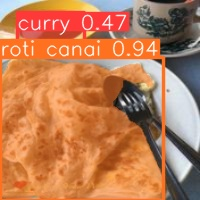

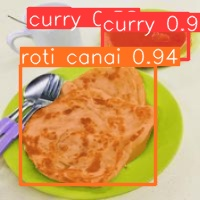

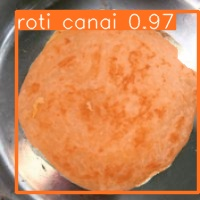

In [81]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}\\runs\\segment\\predict2\\*.jpg')[:3]:
      display(Image(filename=image_path, height=200))
      print("\n")

TESTING MODEL MANUALLY

In [99]:
import os
from IPython.display import Image, display

HOME = os.getcwd()
local_dataset_path = "C:\\Users\\afiqe\\datasets\\FYP-LAMA"
model_path = f"{HOME}\\runs\\segment\\train11\\weights\\best.pt"
output_path = f"{HOME}\\runs\\segment\\predict7"


# input_image_path = f"{HOME}\\Downloads\\DatasetLama\\roti_canai\\150.jpg"
input_image_path = f"{HOME}\\Downloads\\roti_telur.jpg"


In [100]:
# Run prediction
!yolo task=segment mode=predict model={model_path} conf=0.25 source={input_image_path} save=true

Ultralytics YOLOv8.0.196  Python-3.11.5 torch-2.1.0+cpu CPU (Intel Core(TM) i3-10100F 3.60GHz)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 C:\Users\afiqe\Downloads\roti_telur.jpg: 224x128 1 curry, 1 dhal, 1 roti canai, 66.1ms
Speed: 0.0ms preprocess, 66.1ms inference, 3.1ms postprocess per image at shape (1, 3, 224, 128)
Results saved to runs\segment\predict7
 Learn more at https://docs.ultralytics.com/modes/predict


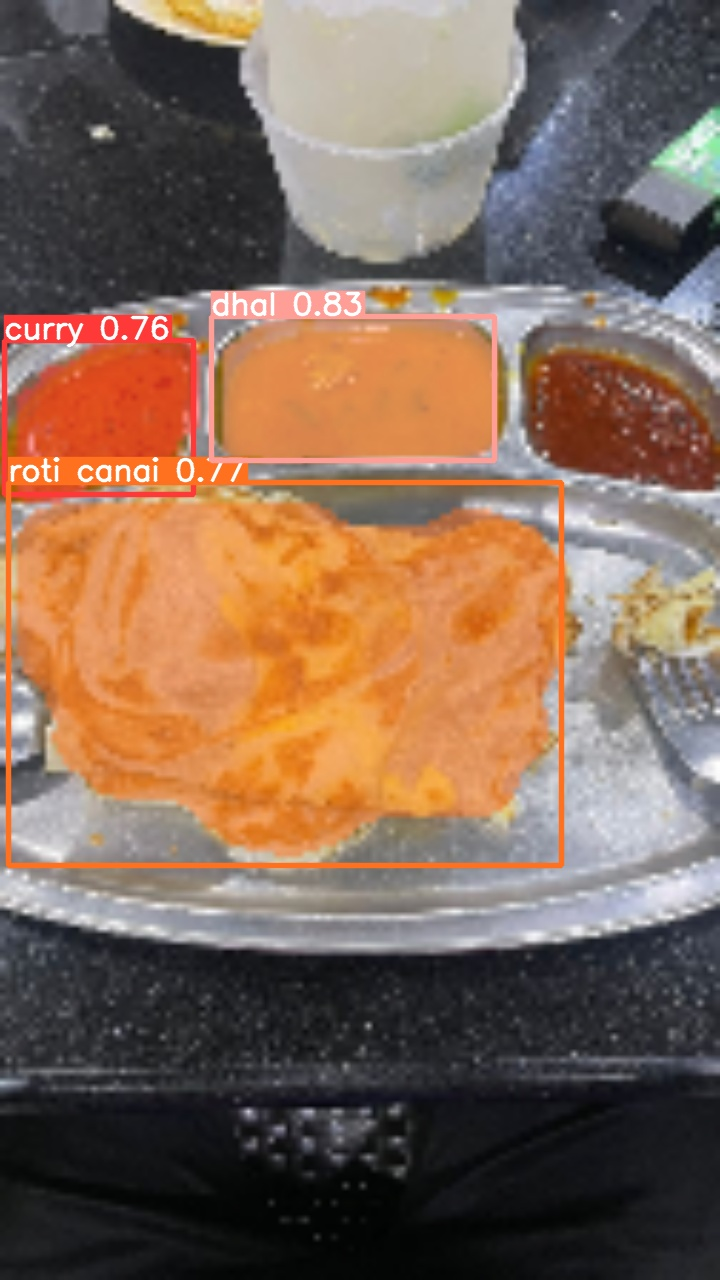

In [101]:
# Display predicted images
for image_path in os.listdir(output_path):
    display(Image(filename=os.path.join(output_path, image_path), height=200))